### Clasificacion Meteorologico /No Meteorologico para datos de Radar con polarizacion simple
#### Basamos la decision en la variable EchoTop, que calcula para cada punto del mapa la mayor altura con reflectividad mayor a 5 dBZ  

In [1]:
import numpy as np
import pyart
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pyart

from radarsmn.QC.Clutter_control import SimPol
from radarsmn.QC.Clutter_control import funrad
#import funrad
#import clas_sp

In [2]:
radar=pyart.io.read('/home/sofia/proyecto/Datos_test/NetCDF/cfrad.20091122_090346.000_to_20091122_090723.000_INTA_Ang_v55_SUR.nc')
radar=pyart.io.read('/home/sofia/proyecto/Datos_test/NetCDF/cfrad.20100209_214344.000_to_20100209_214722.000_INTA_Ang_v131_SUR.nc')
r=radar.extract_sweeps([0])

**Funcion qc_sp**: Clasifica el ppi mas bajo. 

 **Valores de entrada**: 
 1. radar: (objeto radar de pyart)
 2. tr:(float) umbral. puntos con EchoTop menores al umbral se los considerara No meteo, con valores mayores seran clasificados como meteo    
 3. postp: BOOL. TRUE es con postproceso, FALSE, sin. Default: con postproceso 
 
 
 **Valores de salida**:
 Devuelve un  mask array con valor 0 para eco no meteorologico y 1 para eco si meteorologico

In [3]:

cp=SimPol.clas_sp.qc_sp(radar,tr=2)

Et=funrad.echo_top(radar,0)
r.add_field_like('dBZ','clasp',cp)
r.add_field_like('dBZ','Echotop',Et)

/home/sofia/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/sofia/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/sofia/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/sofia/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the construct

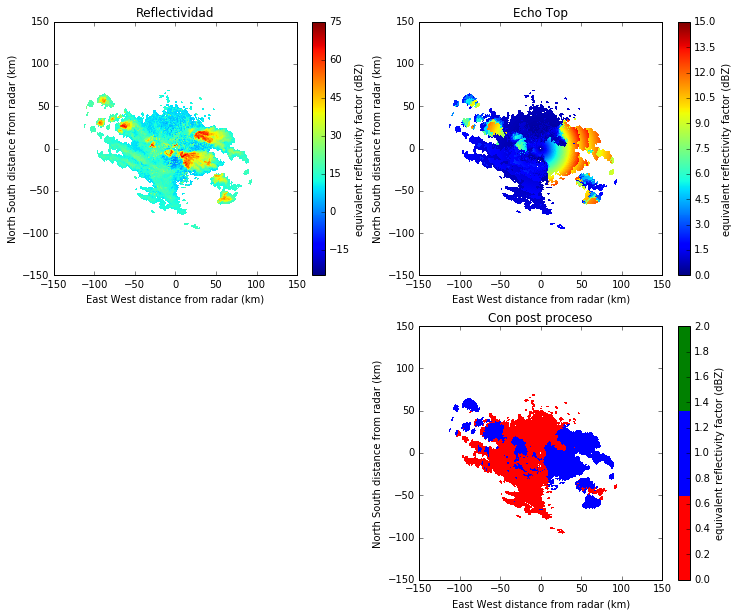

In [4]:
%matplotlib inline


display1 = pyart.graph.RadarMapDisplay(r)
display = pyart.graph.RadarMapDisplay(radar)
cmap = mpl.colors.ListedColormap(['r', 'b', 'g'])
f = plt.figure(figsize = [12,10])

plt.subplot(2, 2, 1) 
display1.plot_ppi('dBZ',vmin=-25,vmax=75,cmap='jet')
plt.title('Reflectividad')
plt.subplot(2, 2, 2) 
display1.plot_ppi('Echotop',vmin=0,vmax=15,cmap='jet')
plt.title('Echo Top')
#plt.subplot(2, 2, 3) 
#display1.plot_ppi('clas',vmin=0,vmax=2,cmap=cmap)
#plt.title('Sin post proceso')
plt.subplot(2, 2, 4) 
display1.plot_ppi('clasp',vmin=0,vmax=2,cmap=cmap)
plt.title('Con post proceso')
plt.show()
#plt.savefig('/home/sofia/RadarMeteo/QC/var_simplepol/imgen_vgz')
plt.close()